In [100]:
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
np.random.seed(10)
%matplotlib inline  

In [101]:
all_df = pd.read_excel("data/titanic3.xls")

In [102]:
all_df[:4]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"


In [103]:
cols=['survived','name','pclass' ,'sex', 'age', 'sibsp',
      'parch', 'fare', 'embarked']
all_df=all_df[cols]
df=all_df.drop(['name'], axis=1)
age_mean = df['age'].mean()
df['age'] = df['age'].fillna(age_mean)
fare_mean = df['fare'].mean()
df['fare'] = df['fare'].fillna(fare_mean)
df['sex']= df['sex'].map({'female':0, 'male': 1}).astype(int)
df = pd.get_dummies(data=df,columns=["embarked" ])


In [104]:
df[:4]

,survived,pclass,sex,age,sibsp,parch,fare,embarked_C,embarked_Q,embarked_S
0,1,1,0,29.0000,0,0,211.3375,0.0,0.0,1.0
1,1,1,1,0.9167,1,2,151.5500,0.0,0.0,1.0
2,0,1,0,2.0000,1,2,151.5500,0.0,0.0,1.0
3,0,1,1,30.0000,1,2,151.5500,0.0,0.0,1.0


In [105]:
x=df.drop(['survived'],axis=1)
x[:2]

,pclass,sex,age,sibsp,parch,fare,embarked_C,embarked_Q,embarked_S
0,1,0,29.0000,0,0,211.3375,0.0,0.0,1.0
1,1,1,0.9167,1,2,151.5500,0.0,0.0,1.0


In [106]:
y = df['survived']
y[:2]

0    1
1    1
Name: survived, dtype: int64

In [107]:
model = RandomForestClassifier()
model.fit(x, y)
importance=model.feature_importances_
result = list(zip(list(x),importance))
result.sort()
result

[('age', 0.26319517352759125),
 ('embarked_C', 0.014271717967976374),
 ('embarked_Q', 0.0077937476977938056),
 ('embarked_S', 0.009955834184656892),
 ('fare', 0.2740979924712195),
 ('parch', 0.04307073718583643),
 ('pclass', 0.0780895181250962),
 ('sex', 0.2722330233214326),
 ('sibsp', 0.037292255518396954)]

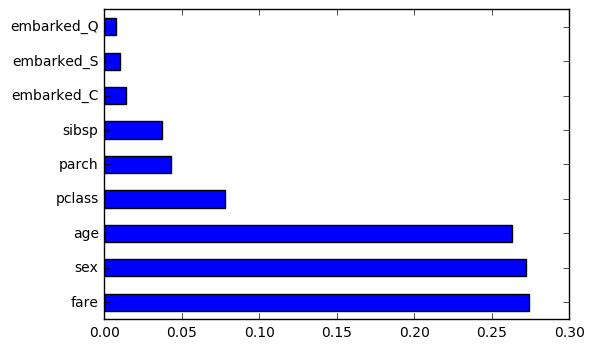

In [108]:
feat_importances = pd.Series(importance, index=list(x))
feat_importances.nlargest(20).plot(kind='barh')

In [109]:
model2=DecisionTreeClassifier(criterion='gini',max_depth=5) 
model2.fit(x, y)
importance2=model2.feature_importances_
importance2
result2 = list(zip(list(x),importance2))
result2.sort()
result2

[('age', 0.10616388287078353),
 ('embarked_C', 0.0),
 ('embarked_Q', 0.00235940572231785),
 ('embarked_S', 0.0),
 ('fare', 0.08222575620916489),
 ('parch', 0.0),
 ('pclass', 0.19185702104320332),
 ('sex', 0.5719616094826864),
 ('sibsp', 0.045432324671844056)]

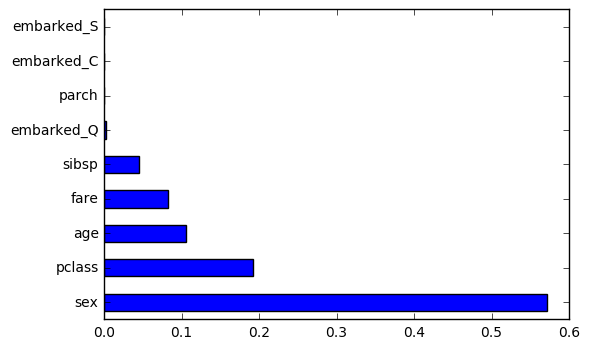

In [110]:
feat_importances = pd.Series(importance2, index=list(x))
feat_importances.nlargest(20).plot(kind='barh')